# Prediction of Wildfire Severity Potential in California 

# 1. Project Title

Title: Prediction of Wildfire Severity Potential in California 

Team Members: Siqi Huang(A14143758), Yifei Ning(A14508232)

# 2. Question Addressed

### Why  we want to focus on wildfires in California?
In California, every year the wildfires will cause uncountable casualties and losses, destroy people’s properties, directly threatening people's' life. It would save thousands of lives and prevent severe losses, if a mechanism is established to predict when and where the wildfire would likely happen in California and what actions people should take when they find there are wildfires around them. This project will target all california residents who are affected by the wildfires. It could also serve as a reference model for California Government to prepare for wildfires.

We are interested in studying where and at what conditions the wildfires may possibly happen in California state; and in the past where are the places that wildfire happen the most. The most common hypothesis is that wildfire will usually occur during when the weather is dry and windy and wildfires would not likely to occur in the same places (we will refine and come up with more hypotheses)

In our project, we expect study relationship between California wildfire and climate attributes like regional temperature, cloudiness, regional moisture, air pressure, wind, and vegetation. We would also make a precise
prediction model based on the spatial data we have.

# 3. Background and literature

The Center for Climate and Energy Solutions have written in their article Wildfires and Climate Change that changes in climate have boosted fire activity in some areas of California. The hot, dry conditions by the climate change have largely increased the likeness and area of regions that might have wildfire in California. The article from Western Wildland Environmental Threat Assessment Center points out the signficance of fuel management to wildfire. By the article Fire, Ecology, and Management from Idaho Firewise Inc., the three important factors of a wildfire behavior are weather, topography, and fuels. According to all these references, we will also create a model to predict the likely severity of occurrence of California wildfire ased on the data from Wildfires and Climate Change.

From these references, we have selected the factors we will be using for the predictions. These articles have pointed out that the climate, fuel, and topography are the most important things that might result in wildfire. Thus, when we are looking for data, we focus on data related to climate, such us weather, precipitatio, etc., data related to fuel, which we are using land cover in this project, and data related to topography.

### References:
    1. http://idahofirewise.org/fire-ecology-and-management/wildfire-ignition-behavior-and-effects/
    2. https://www.c2es.org/content/wildfires-and-climate-change/
    3. https://www.fs.fed.us/wwetac/brief/wildfire-risk-and-fuels-management.php
    4. https://blog.ucsusa.org/brenda-ekwurzel/california-4-factors-to-watch-that-increase-wildfire-danger

# 3. Python Libraries or Arcgis Modules

### LIbraries:
1. pandas: to analyze data
2. numpy: to analyze data
3. geopandas: to read and modify geodatas
4. seaborn: to plot graphs
5. zipfile: to unzip files
6. Shapely: to create points or polygons
7. sklearn: to transform data in order to be used for analysis
8. matplot: visulize raster/maps; the main place for the analysis to take on

### Arcgis Modules:
1. arcgis.raster: to do raster analysis
2. arcgis.gis: upload/share/save layers
3. arcgis.features: won't be used directly; define GeoAccessor/GeoSeriesAccessor
4. arcgis.geocoding: coding geometries, locating places on maps
5. arcgis.geoenrichment: enrich layers with statistics

In [28]:
#imports libraries and arcgis modules
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import pysal as ps
import shutil
import zipfile
import matplotlib.pyplot as plt
from scipy.optimize import geocode

import arcgis
import arcgis.raster
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import SpatialDataFrame
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.geocoding import geocode
from arcgis.geoenrichment import *
from arcgis.raster import *

from shapely.geometry import Point 
from shapely.geometry.polygon import Polygon

from IPython.display import display
import matplotlib.pyplot as plt

from scipy.optimize import fmin, minimize
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns

In [2]:
gis = GIS(username='sih041_UCSDOnline2')

Enter password: ········


# 5. Data Sources

1. https://elevation.arcgis.com/arcgis/rest/services/WorldElevation/Terrain/ImageServer: This is the image layer for world elevation. We will use it as the topography feature.
2. https://landscape3.arcgis.com/arcgis/rest/services/USA_Mean_Temperature/ImageServer: This is image layer for temperature, which will be used as the climate info of the model.
3. https://landscape3.arcgis.com/arcgis/rest/services/USA_Mean_Rainfall/ImageServer: This is the rainfall layer, which will also be a climate info of the model
4. https://frap.fire.ca.gov/data/frapgisdata-sw-fireperimeters_download: This is the previous wildfire that happened in California, we will use it as a training set
5. https://data.ca.gov/dataset/ca-geographic-boundaries/resource/e0107f72-1088-40a9-9443-6e657cadb805: The California boundary shapefile to help us find 
6. https://www.ncdc.noaa.gov/cdo-web/: The weather data of USA including precipitation and temperature for years by stations. We use it as the weather data. We also get stations lat and long from this website.

Since we use two methods to train for the model, we will separate into two blocks to talk about our imports.

## Data Sources for the First Method

In [ ]:
#read all the dataset needed
#read the weather data files from 2010 to 2018
weather10 = pd.read_csv('data_final/2010.csv', header = None)
weather11 = pd.read_csv('data_final/2011.csv', header = None)
weather12 = pd.read_csv('data_final/2012.csv', header = None)
weather13 = pd.read_csv('data_final/2013.csv', header = None)
weather14 = pd.read_csv('data_final/2014.csv', header = None)
weather15 = pd.read_csv('data_final/2015.csv', header = None)
weather16 = pd.read_csv('data_final/2016.csv', header = None)
weather17 = pd.read_csv('data_final/2017.csv', header = None)
weather18 = pd.read_csv('data_final/2018.csv', header = None)

#read the weather stations file
stations = pd.read_csv('data_final/ghcnd-stations.txt', delimiter = '\t', header = None)

#read the California boundary file
ca_state_boundary = gpd.read_file('data_final/ca_state/CA_State_TIGER2016.shp')

#since we have saved this file before, to make it easier for us, we use the saved version of needed wildfire data
wildfire = gpd.read_file('data_final/ca_wildfire_recent/ca_wildfire_recent.shp')

## Data Source for the Second Method

In [ ]:
#Get the AOI geometry
usa_elevation = ImageryLayer(
    'https://elevation.arcgis.com/arcgis/rest/services/WorldElevation/Terrain/ImageServer',gis)
usa_elevation.extent['spatialReference']
study_area_gcd = geocode(address='USA', out_sr=usa_elevation.extent['spatialReference'])
study_area_extent = study_area_gcd[0]['extent']
states_item = gis.content.search("99fd67933e754a1181cc755146be21ca", 'Feature Layer', outside_org=True)[0]
states_layer = states_item.layers[0]
study_area_query = states_layer.query('STATE_FIPS = 06', return_geometry=True)
study_area_geom = study_area_query.features[0].geometry
study_area_geom['spatialReference'] = study_area_query.spatial_reference

#read all the image layers
usa_mean_temperature = ImageryLayer(
    "https://landscape3.arcgis.com/arcgis/rest/services/USA_Mean_Temperature/ImageServer", gis)
usa_mean_temperature.extent = study_area_extent
usa_mean_rainfall = ImageryLayer(
    "https://landscape3.arcgis.com/arcgis/rest/services/USA_Mean_Rainfall/ImageServer", gis)
usa_mean_rainfall.extent = study_area_extent
usa_elevation = ImageryLayer('https://elevation.arcgis.com/arcgis/rest/services/WorldElevation/Terrain/ImageServer',
                             gis)

# 8. Analysis

In our project, we used two methods to train the best coefficients combine the raster layers we have. We will explain our methods in detail in the following.

# Method 1
For method one, we used the weather data from weather stations and the shapefile of the statoins. We then applied to mean temperature and mean rainfall raster layers.

We first found out the weather stations which locates in California. Then, for weather data from each year, we first took out the weather data inside California. Next, we used the weather stations which have recorded the rainfall and temperature for over 300 days to ensure that our mean temperature and mean rainfall are presentative for the year. We then grouped these weather data by stations and calculated each year's mean rainfall and mean temperature. In this method, we analyze mean precipitation as mean rainfall, which later we will apply to raster combination. 

Later, we looked at the severity of wildfires, which is the shape area of each wildfire in this case. We realised that the distribution is too right-skewed and decided to log the shape area of wildfires. 

Lastly, we used linear regression to regress to the transformed shape area with mean temperature and precipitation of each wildfire and applied these coefficient to combine mean rainfall and mean temperature on Arcgis Pro and published the layer.


# Method 2
### How do we determine what features/labels to include in the model?

The graph below from google shows the most important three conditions that must have for a wildfire to start. They are weather, fuel, and topography. To better reflect the probability/likeiness of a wildfire to start, we included the annual rain precipitation, the usa annual temperature, as well as the land cover types in this sutablity model.
Each of them represent one side of the fire behavior triangle below. For example, the annual rain precipitation should lie on the "weather" section etc.

<img src="img_1.png" style="width: 400px;"/>

### Festures: in this model we will set the features to be 
   - usa annual **temperature**, as it represents some index of weather that may innfluence how wildfire will develop
   - usa annual **rainfall precipitation**, as it represents weather and somehow vegetation abundance.
   - **land cover**' though is takes categorical values, we will treat it so. 
   
### Label: in this model we will set the features to be
   - the **area of land** in acres burnt from past decades.


The chart below illustrate the idea what the data will look like this:

<img src="img_5.PNG" style="width: 800px;"/>

On the left handside, we have multiple layers being stacked to form a "bulk" and on the right hand side we have the labels images which have the areas of fire. Also, each feature image layer will be assigned to a constant parameter. This parameter was initialize to be 1 in our model.

### Suitability Model
   - **Area of land get affected = F(rain, temp, land) = (a * rain + b * temp) * c * land**

### Workflow

   - **determine parameters**
   
    After determined what features/labels to have. We need to split the data into training set and test set. We will 
    using those features (rain, temp, land cover) and label (area get burnt) to train our model.


   - **sample sub-image patches**
   
    To speed up the implmentation process, matrix multiplication is used. We merged all the feature images into a 
    bulk of shape (bulk_size, image_width, image_height, num_layers) and reshaped the label images and make their 
    shape to be (bulk_size, image_width, image_height). The bulk_size is also the number of random image patches 
    (sub-regions) drawn from the original images. The reason why we use random sample patches is because we want to 
    filter out the error regions. As you will see later in the analysis, some regions in the usa fire raster don't 
    have raster values. If we use those regions, the coeifficients we trained will be biased. 


   - **define a loss to minimize**
   
    Before, we start to train the parameters, we will need to start define the loss. To compare the difference 
    between two images, the Mean Squared Error is used. $MSE(I_1, I_2) = \sum_x(\sum_y((I_1<x, y> - I_1<x, y>)^2))$.
    The first summation takes over the horizontal axis, and the second summation takes along the vertical axis. This 
    loss function will serve as the criteria as we move on.
 

  - **convolving a kernel / applying focal**
  
    the layer we use will for sure have errors and we also only want to capture a general trend and possibly ignore 
    some detils. In order to achieve those two goals, we apply a guassian kernel with a specified size. This Guassian 
    kernel when applied will summarize all the neigbornood raster values according to its assigned weights. Since 
    this is a Gussian Kernel we are assuming that the closer the data is, more correlated they are. The illustration 
    is included later in this project.

<img src="img_2.PNG" style="width: 400px;"/>



  - **train the model**
  
    they are lots of ways to optimize the loss (MSE) we define previously. The one we used is the most common one.
    Grid Search Algorithm. Definitedly, the running algorithms can be improve. We will talk about this on our 
    evaluation section. Another good approach is gredient descent.


 - **evaluation and improvements**
   
   better algorithms will guarate us to find the local minimum. Meantime, save our time.
    

# 6. Data Cleaning

In [31]:
# fire station
# escape route

usa_mean_temperature.query('OBJECTID = 11')

<FeatureSet> 1 features

In [32]:
usa_mean_temperature.query().sdf

,Category,MaxPS,MinPS,Name,OBJECTID,SHAPE,Shape_Area,Shape_Length
0,1,3.748356e+03,0.000000,Temperature_US_USDA_2000_Celsius,11,"{""rings"": [[[-2852881.220899999, -1846645.1409...",1.915690e+13,1.816641e+07
1,2,7.496712e+03,3748.355908,Ov_i06_L01_R00000000_C00000000.tif,12,"{""rings"": [[[2505393.549800001, -1846645.1409]...",1.784025e+13,1.737550e+07
2,2,7.496712e+03,3748.355908,Ov_i06_L01_R00000000_C00000001.tif,13,"{""rings"": [[[2900845.098099999, -1846645.1409]...",1.316647e+12,7.449857e+06
3,2,1.499342e+04,7496.711816,Ov_i06_L02_R00000000_C00000000.tif,14,"{""rings"": [[[2900845.098099999, -1846645.1409]...",1.915690e+13,1.816641e+07
4,2,2.998685e+04,14993.423633,Ov_i06_L03_R00000000_C00000000.tif,15,"{""rings"": [[[2900845.098099999, -1846645.1409]...",1.915690e+13,1.816641e+07
5,2,1.499342e+06,29986.847265,Ov_i06_L04_R00000000_C00000000.tif,16,"{""rings"": [[[2900845.098099999, -1846645.1409]...",1.915690e+13,1.816641e+07


In [5]:
#We did cleaning for weather stations and the wildfire data

In [4]:
#check the weather stations dataset
stations.head()

,0
0,ACW00011604 17.1167 -61.7833 10.1 ST JO...
1,ACW00011647 17.1333 -61.7833 19.2 ST JO...
2,AE000041196 25.3330 55.5170 34.0 SHARJ...
3,AEM00041194 25.2550 55.3640 10.4 DUBAI...
4,AEM00041217 24.4330 54.6510 26.8 ABU D...


In [5]:
len('ACW00011604 17.1167 -61.7833 10.1')

33

In [6]:
#arrange stations into three-column dataframe
stations[0] = stations[0].apply(lambda x:x[:31])
stations[0] = stations[0].str.split()
stations['lat'] = pd.to_numeric(stations[0].apply(lambda x: x[1]))
stations['lon'] = pd.to_numeric(stations[0].apply(lambda x: x[2]))
stations['stations'] = stations[0].apply(lambda x: x[0])
stations = stations.drop(0, axis = 1)
stations.head()

,lat,lon,stations
0,17.1167,-61.7833,ACW00011604
1,17.1333,-61.7833,ACW00011647
2,25.3330,55.5170,AE000041196
3,25.2550,55.3640,AEM00041194
4,24.4330,54.6510,AEM00041217


In [7]:
#arrange latitude and longtitude into point
geometry = [Point(xy) for xy in zip(stations['lon'], stations['lat'])]

In [8]:
#arrange the dataframe into a geodataframe
stations_gdf = gpd.GeoDataFrame(stations, 
                                crs = {'init': 'epsg:4326'}, 
                                geometry = geometry)
stations_gdf.head()

,lat,lon,stations,geometry
0,17.1167,-61.7833,ACW00011604,POINT (-61.7833 17.1167)
1,17.1333,-61.7833,ACW00011647,POINT (-61.7833 17.1333)
2,25.3330,55.5170,AE000041196,POINT (55.517 25.333)
3,25.2550,55.3640,AEM00041194,POINT (55.364 25.255)
4,24.4330,54.6510,AEM00041217,POINT (54.651 24.433)


In [9]:
#check the crs
ca_state_boundary.crs

{'init': 'epsg:3857'}

In [10]:
#change the California state boundary crs
ca_state_boundary = ca_state_boundary.to_crs({'init': 'epsg:4326'})
ca_state_boundary = ca_state_boundary['geometry']

In [11]:
#find all the stations inside California
in_state = stations_gdf['geometry'].apply(lambda x: ca_state_boundary.contains(x))
in_state_stations = stations_gdf[in_state[0].values]
in_state_stations.head()

,lat,lon,stations,geometry
55573,37.8123,-122.2160,US1CAAL0001,POINT (-122.216 37.8123)
55574,37.7075,-122.0687,US1CAAL0002,POINT (-122.0687 37.7075)
55575,37.7169,-122.0585,US1CAAL0003,POINT (-122.0585 37.7169)
55576,37.6483,-121.8745,US1CAAL0004,POINT (-121.8745 37.6483)
55577,37.8319,-122.2503,US1CAAL0006,POINT (-122.2503 37.8319)


In [12]:
#make a list of all California weather station
cal_stations = in_state_stations['stations'].tolist()

In [13]:
#check if there are any duplicates of stations
in_state_stations['stations'].nunique() == len(in_state_stations)

True

In [14]:
#transfer the stations and geometry to a dictionary
stat_dict = in_state_stations.drop(['lat', 'lon'], axis = 1)
stat_dict = stat_dict.set_index('stations', drop = True).to_dict()['geometry']

### California Weather Year 2010

In [15]:
#According to their websites description of their dataset,
#we choose the values we are interested in for all weather data
feat_lst = ['TAVG', 'PRCP']

In [18]:
weather10 = pd.read_csv('data_final/2010.csv', header = None)
#we will first extract the stations that are in California
cal_weather10 = weather10[weather10[0].isin(cal_stations)]

In [19]:
#We will only be focusing on the values recorded and will exclude other special conditions happened,
#so we will drop all the columns after3
cal_weather10 = cal_weather10.drop(list(range(4,8)), axis = 1)

In [20]:
#give the names to all the columns
col_names = ['stations', 'date', 'features', 'value']
cal_weather10.columns = col_names

In [21]:
#take the features we are interested in
cal_weather10 = cal_weather10[cal_weather10['features'].isin(feat_lst)]
cal_weather10.head(5)

,stations,date,features,value
130,US1CAIN0001,20100101,PRCP,0
134,US1CASR0001,20100101,PRCP,0
136,US1CATL0001,20100101,PRCP,0
221,USR0000CCAS,20100101,TAVG,158
224,USR0000CFIV,20100101,TAVG,63


#### Precipitation

In [22]:
#for different features, we will establish dataframes for us to use it later
#right now it is precipitation
prcp10 = cal_weather10[cal_weather10['features'] == 'PRCP']
prcp10.head()

,stations,date,features,value
130,US1CAIN0001,20100101,PRCP,0
134,US1CASR0001,20100101,PRCP,0
136,US1CATL0001,20100101,PRCP,0
307,USS0019L03S,20100101,PRCP,0
836,US1CAAL0004,20100101,PRCP,0


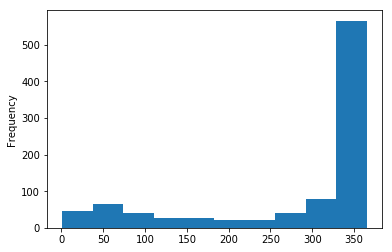

In [23]:
prcp10.groupby('stations').size().plot(kind = 'hist')

In [24]:
#exclude the stations with little observations should be excluded
prcp10_cnt = pd.DataFrame(prcp10.groupby('stations').size(), columns = ['cnt'])
prcp10_cnt = prcp10_cnt[prcp10_cnt['cnt'] >= 300]
prcp10_stations = prcp10_cnt.index.tolist()

In [25]:
prcp10 = prcp10[prcp10['stations'].isin(prcp10_stations).values]

In [26]:
prcp10.head()

,stations,date,features,value
130,US1CAIN0001,20100101,PRCP,0
134,US1CASR0001,20100101,PRCP,0
307,USS0019L03S,20100101,PRCP,0
836,US1CAAL0004,20100101,PRCP,0
1093,US1CASD0029,20100101,PRCP,0


In [27]:
prcp10.groupby('stations').agg({'value': ['mean', 'min', 'max', 'median']}).head()

value                
                  mean min  max median
stations                              
US1CAAL0001  20.855908   0  437      0
US1CAAL0002  22.072072   0  445      0
US1CAAL0004  16.008929   0  373      0
US1CAAL0007  13.364516   0  292      0
US1CAAM0002  40.819484   0  836      0

In [28]:
prcp10 = pd.DataFrame(prcp10.groupby('stations')['value'].mean())
prcp10['geometry'] = pd.Series(prcp10.index.tolist()).apply(lambda x: stat_dict[x]).values

In [29]:
prcp10.head()

,value,geometry
stations,,
US1CAAL0001,20.855908,POINT (-122.216 37.8123)
US1CAAL0002,22.072072,POINT (-122.0687 37.7075)
US1CAAL0004,16.008929,POINT (-121.8745 37.6483)
US1CAAL0007,13.364516,POINT (-121.9523 37.515)
US1CAAM0002,40.819484,POINT (-120.5604 38.4969)


#### Average Temperature

In [30]:
tavg10 = cal_weather10[cal_weather10['features'] == 'TAVG']
tavg10['value'] = tavg10['value']/10
tavg10.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,stations,date,features,value
221,USR0000CCAS,20100101,TAVG,15.8
224,USR0000CFIV,20100101,TAVG,6.3
227,USR0000CHAS,20100101,TAVG,10.4
309,USS0019L03S,20100101,TAVG,0.5
1740,USR0000CCHC,20100101,TAVG,12.1


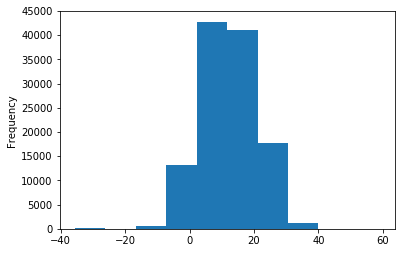

In [31]:
tavg10['value'].plot(kind = 'hist')

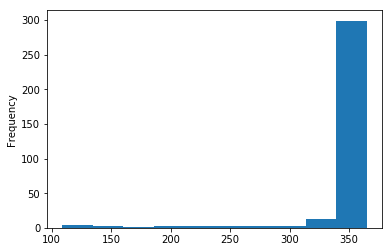

In [32]:
tavg_cnt = tavg10.groupby('stations').size()
tavg_cnt.plot(kind = 'hist')

In [33]:
#still choose 300 days as a minimum requirement of observations
tavg_cnt = tavg_cnt[tavg_cnt > 300]
tavg_sta = tavg_cnt.index.tolist()

In [34]:
tavg10 = tavg10[tavg10['stations'].isin(tavg_sta)]
tavg10.groupby('stations').agg({'value': ['mean', 'median']}).head()

value       
                  mean median
stations                     
USR0000CABS  14.110685  12.30
USR0000CACT  15.747091  14.40
USR0000CAGD  14.423562  14.30
USR0000CALD  11.335278  10.55
USR0000CALP  16.493425  16.40

In [35]:
tavg10 = pd.DataFrame(tavg10.groupby('stations')['value'].mean())
tavg10['geometry'] = pd.Series(tavg10.index.tolist()).apply(lambda x: stat_dict[x]).values

In [36]:
tavg10.head()

,value,geometry
stations,,
USR0000CABS,14.110685,POINT (-122.8333 40.3983)
USR0000CACT,15.747091,POINT (-118.2 34.4458)
USR0000CAGD,14.423562,POINT (-120.3919 35.1792)
USR0000CALD,11.335278,POINT (-122.7236 39.6514)
USR0000CALP,16.493425,POINT (-116.7392 32.8336)


#### Compute These Features for the Dataset

In [16]:
wildfire_df = wildfire[['YEAR_', 'Shape_Area', 'geometry']]
wildfire_df['PRCP'] = np.nan
wildfire_df['TAVG'] = np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
wildfire_df.head()

,YEAR_,Shape_Area,geometry,PRCP,TAVG
0,2010,13440.409324,POLYGON ((-122.3355749463876 41.65647997323914...,NaN,NaN
1,2010,5549.800113,POLYGON ((-122.7864958851477 41.60234322642694...,NaN,NaN
2,2010,29121.894995,"POLYGON ((-122.4781767797478 41.6088500302852,...",NaN,NaN
3,2010,924.186700,"POLYGON ((-122.91199075112 41.44231176886759, ...",NaN,NaN
4,2010,783545.309848,POLYGON ((-120.2104930881078 35.73980331527259...,NaN,NaN


In [39]:
wildfire_df10 = wildfire_df[wildfire_df['YEAR_'] == '2010']

In [41]:
all_poss_stations = pd.Series(list(set(prcp10.index.tolist() + tavg10.index.tolist())))
all_poss_geo = gpd.GeoSeries(all_poss_stations.apply(lambda x: stat_dict[x]).tolist(), index = all_poss_stations)

In [18]:
#the function to help compute the precipitation and average temperature
def compute_weather_data(df, stations, geoseries, prcp, tavg):
    for i in df.index:
        compute_dis = False
        cur_geo = df.loc[i, 'geometry']
        #find the station points which are located inside the fire area
        lst = [x for x in stations if cur_geo.contains(stat_dict[x])]
        lst += [x for x in stations if cur_geo.contains(stat_dict[x])]
        
        #also find the distance of each station from each wildfire
        s = geoseries.distance(cur_geo)
        s = s[s < 5]
        s = s.sort_values()
        
        if len(lst) == 0:
            compute_dis = True 
        #if the are no stations located inside the fire area, we will choose the five closest station    
        if compute_dis:
            cor_sta = s.index.tolist()
            prcp_sta = [x for x in cor_sta if x in prcp.index][:5]
            tavg_sta = [x for x in cor_sta if x in tavg.index][:5]
            
            #compute the values by taking their mean
            df.loc[i, 'PRCP'] = prcp.loc[prcp_sta, 'value'].values.mean()
            df.loc[i, 'TAVG'] = tavg.loc[tavg_sta, 'value'].values.mean()
        else:
            #take the stations inside the fire area
            cor_sta = s.index.tolist()
            prcp_sta = [x for x in lst if x in prcp.index]
            tavg_sta = [x for x in lst if x in tavg.index]
            
            if len(prcp_sta) == 0:
                prcp_sta = [x for x in cor_sta if x in prcp.index][:5]
            if len(tavg_sta) == 0:
                tavg_sta = [x for x in cor_sta if x in tavg.index][:5]

            #compute values inside by taking their mean
            df.loc[i, 'PRCP'] = prcp.loc[prcp_sta, 'value'].values.mean()
            df.loc[i, 'TAVG'] = tavg.loc[tavg_sta, 'value'].values.mean()
    return df

In [43]:
wildfire10 = compute_weather_data(wildfire_df10, all_poss_stations, all_poss_geo, prcp10, tavg10)
wildfire10.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
0,2010,13440.409324,POLYGON ((-122.3355749463876 41.65647997323914...,13.381419,9.858038
1,2010,5549.800113,POLYGON ((-122.7864958851477 41.60234322642694...,17.725248,10.330862
2,2010,29121.894995,"POLYGON ((-122.4781767797478 41.6088500302852,...",15.878727,11.160889
3,2010,924.186700,"POLYGON ((-122.91199075112 41.44231176886759, ...",17.725248,9.397549
4,2010,783545.309848,POLYGON ((-120.2104930881078 35.73980331527259...,13.463644,14.967233


In [44]:
wildfire10.to_file('data_final/wildfire_year/wildfire10.shp')

In [19]:
#This function adds PRCP and TAVG for the dataset inputted
def transform_and_compute_dataset(weather, year, wildfire, cal_stations, stat_dict):
    
    feat_lst = ['TAVG', 'PRCP']
    col_names = ['stations', 'date', 'features', 'value']
    
    cal_weather = weather[weather[0].isin(cal_stations)]
    cal_weather = cal_weather.drop(list(range(4,8)), axis = 1)
    cal_weather.columns = col_names
    #take the features we are interested in
    cal_weather = cal_weather[cal_weather['features'].isin(feat_lst)]

    #precipitation
    prcp = cal_weather[cal_weather['features'] == 'PRCP']
    #still choosing 180 as the minimum to cut of
    prcp_cnt = pd.DataFrame(prcp.groupby('stations').size(), columns = ['cnt'])
    prcp_cnt = prcp_cnt[prcp_cnt['cnt'] >= 300]
    prcp_stations = prcp_cnt.index.tolist()
    prcp = prcp[prcp['stations'].isin(prcp_stations).values]
    prcp = pd.DataFrame(prcp.groupby('stations')['value'].mean())

    #Average Temperature
    tavg = cal_weather[cal_weather['features'] == 'TAVG']
    tavg['value'] = tavg['value']/10
    tavg_cnt = tavg.groupby('stations').size()
    #still choose 300 days as a minimum requirement of observations
    tavg_cnt = tavg_cnt[tavg_cnt >= 300]
    tavg_sta = tavg_cnt.index.tolist()
    tavg = tavg[tavg['stations'].isin(tavg_sta)]
    tavg = pd.DataFrame(tavg.groupby('stations')['value'].mean())
    
    #Compute features
    wildfire_cur = wildfire_df[wildfire_df['YEAR_'] == year]
    all_poss_stat = pd.Series(list(set(prcp.index.tolist() + tavg.index.tolist())))
    all_poss_geo = gpd.GeoSeries(all_poss_stat.apply(lambda x: stat_dict[x]).tolist(), index = all_poss_stat)
    
    return compute_weather_data(wildfire_cur, all_poss_stat, all_poss_geo, prcp, tavg)

In [46]:
#Year 2011
weather11 = pd.read_csv('data_final/2011.csv', header = None)

In [47]:
wildfire11 = transform_and_compute_dataset(weather11, '2011', wildfire_df, cal_stations, stat_dict)
wildfire11.to_file('data_final/wildfire_year/wildfire11.shp')
wildfire11.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
258,2011,1.883270e+05,POLYGON ((-120.4614351785722 38.75472580359317...,31.045018,8.226558
259,2011,5.983746e+04,POLYGON ((-120.5472237001038 38.73545616377031...,28.338820,9.907982
260,2011,1.047742e+05,POLYGON ((-118.6721843238299 34.55625080080899...,9.704393,15.931288
261,2011,4.866172e+03,"POLYGON ((-118.7377624415792 34.6346715325152,...",10.047075,15.750982
262,2011,2.436173e+06,POLYGON ((-118.3274560408536 34.54776358371893...,7.732166,15.608938


In [48]:
#Year 2012
weather12 = pd.read_csv('data_final/2012.csv', header = None)

In [49]:
wildfire12 = transform_and_compute_dataset(weather12, '2012', wildfire_df, cal_stations, stat_dict)
wildfire12.to_file('data_final/wildfire_year/wildfire12.shp')
wildfire12.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
47,2012,3163.715159,POLYGON ((-118.4610328759685 35.39825798977561...,5.747989,14.773280
48,2012,53046.615706,POLYGON ((-118.9011500064889 34.95669284713551...,5.631743,14.536724
49,2012,701206.527370,POLYGON ((-119.2136662203733 34.90843800112719...,6.251212,14.274264
50,2012,834052.398969,POLYGON ((-118.8981329048816 34.91268433205651...,5.631743,14.536724
51,2012,59428.342240,"POLYGON ((-119.4581222500592 35.1251792903976,...",4.141731,14.442892


In [50]:
#Year 2013
weather13 = pd.read_csv('data_final/2013.csv', header = None)

In [51]:
wildfire13 = transform_and_compute_dataset(weather13, '2013', wildfire_df, cal_stations, stat_dict)
wildfire13.to_file('data_final/wildfire_year/wildfire13.shp')
wildfire13.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
876,2013,44251.304766,POLYGON ((-120.7886328101457 38.98207866147734...,10.902363,14.259178
877,2013,833978.847505,POLYGON ((-118.4575180516561 34.56762090551445...,2.460274,17.233680
878,2013,71972.227732,POLYGON ((-118.7507158714775 34.64510253315904...,3.303110,16.894192
879,2013,20332.630717,POLYGON ((-118.4990297370265 34.55758148051932...,2.460274,17.233680
880,2013,198799.458754,POLYGON ((-118.6968052263882 34.58155732204662...,2.652353,17.190849


In [22]:
#Year 2014
weather14 = pd.read_csv('data_final/2014.csv', header = None)

In [26]:
wildfire14 = transform_and_compute_dataset(weather14, '2014', wildfire_df, cal_stations, stat_dict)
wildfire14.to_file('data_final/wildfire_year/wildfire14.shp')
wildfire14.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
85,2014,8.667722e+06,POLYGON ((-117.5504694467885 34.19044269187432...,7.139811,18.631771
1140,2014,1.715572e+07,"POLYGON ((-120.7960780955332 38.5612429729256,...",25.573031,15.858521
1141,2014,7.348884e+04,POLYGON ((-118.3577133306824 37.25185239201088...,2.593373,14.225699
1142,2014,4.589940e+05,"POLYGON ((-118.371413789368 37.4115322174294, ...",3.559663,14.679068
1143,2014,1.360051e+06,POLYGON ((-121.9086699995082 39.54820600019979...,19.068505,17.871945


In [27]:
#Year 2015
weather15 = pd.read_csv('data_final/2015.csv', header = None)

In [28]:
wildfire15 = transform_and_compute_dataset(weather15, '2015', wildfire_df, cal_stations, stat_dict)
wildfire15.to_file('data_final/wildfire_year/wildfire15.shp')
wildfire15.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
1439,2015,2.867057e+08,"POLYGON ((-120.678552448902 38.33619750140033,...",21.565545,15.676548
1440,2015,1.447117e+06,POLYGON ((-121.0762275644499 38.44154268792248...,8.945067,16.703945
1441,2015,2.185209e+05,POLYGON ((-117.0424676247885 34.08339524423022...,7.391411,13.434521
1442,2015,2.645640e+07,"POLYGON ((-118.6532677686382 37.5287318517199,...",7.936995,11.883781
1443,2015,4.352472e+06,POLYGON ((-121.5980546973484 36.40373317428114...,10.941412,15.720438


In [29]:
#Year 2016
weather16 = pd.read_csv('data_final/2016.csv', header = None)

In [30]:
wildfire16 = transform_and_compute_dataset(weather16, '2016', wildfire_df, cal_stations, stat_dict)
wildfire16.to_file('data_final/wildfire_year/wildfire16.shp')
wildfire16.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
25,2016,215.429882,(POLYGON ((-121.5030540252151 41.7184329013789...,11.811313,9.536270
26,2016,2017.058906,POLYGON ((-122.9328340939647 38.18661366273396...,27.432996,14.632737
27,2016,4724.249576,POLYGON ((-118.9480349295171 34.04748804695813...,7.302408,18.069596
28,2016,314.580697,POLYGON ((-118.7272309600891 34.13778733255537...,7.675707,18.069596
29,2016,45831.821744,POLYGON ((-118.9115111078681 34.08538508306732...,7.527063,18.069596


In [31]:
#Year 2017
weather17 = pd.read_csv('data_final/2017.csv', header = None)

In [32]:
wildfire17 = transform_and_compute_dataset(weather17, '2017', wildfire_df, cal_stations, stat_dict)
wildfire17.to_file('data_final/wildfire_year/wildfire17.shp')
wildfire17.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
2080,2017,40645.893555,POLYGON ((-118.8454197106887 34.13449566459146...,11.192868,18.284582
2081,2017,4816.200422,POLYGON ((-119.3579984111728 34.33981534256679...,13.871982,16.255083
2082,2017,190987.458766,POLYGON ((-118.9785913837493 34.20477737206789...,11.355503,18.139760
2083,2017,4688.477312,POLYGON ((-118.8428036365729 34.12986782695616...,11.192868,18.284582
2084,2017,11708.877443,POLYGON ((-118.8440727936369 34.13436455147527...,11.192868,18.284582


In [20]:
#Year 2018
weather18 = pd.read_csv('data_final/2018.csv', header = None)

In [21]:
wildfire18 = transform_and_compute_dataset(weather18, '2018', wildfire_df, cal_stations, stat_dict)
wildfire18.to_file('data_final/wildfire_year/wildfire18.shp')
wildfire18.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YEAR_,Shape_Area,geometry,PRCP,TAVG
2190,2018,7.785286e+04,POLYGON ((-120.1828210996595 34.71319961293025...,9.054663,15.672493
2194,2018,7.670305e+05,(POLYGON ((-119.8015019574293 34.9386212707960...,7.536082,16.419671
2692,2018,2.575232e+05,(POLYGON ((-121.0926887763383 38.2557274929563...,14.407647,16.294685
2693,2018,2.050138e+05,POLYGON ((-121.1783003515353 38.58453218170046...,17.578138,16.223452
2694,2018,1.278785e+06,POLYGON ((-121.0326967471006 38.54475568516581...,18.611493,16.223452


In [22]:
#Since Jupyter died a lot, we saved shapefile and read from them directly
wildfire10 = gpd.read_file('data_final/wildfire_year/wildfire10.shp')
wildfire11 = gpd.read_file('data_final/wildfire_year/wildfire11.shp')
wildfire12 = gpd.read_file('data_final/wildfire_year/wildfire12.shp')
wildfire13 = gpd.read_file('data_final/wildfire_year/wildfire13.shp')
wildfire14 = gpd.read_file('data_final/wildfire_year/wildfire14.shp')
wildfire15 = gpd.read_file('data_final/wildfire_year/wildfire15.shp')
wildfire16 = gpd.read_file('data_final/wildfire_year/wildfire16.shp')
wildfire17 = gpd.read_file('data_final/wildfire_year/wildfire17.shp')
wildfire18 = gpd.read_file('data_final/wildfire_year/wildfire17.shp')

In [63]:
all_wildfire = [wildfire10, wildfire11, wildfire12, wildfire13, wildfire14, 
                wildfire15, wildfire16, wildfire17, wildfire18]
all_wildfire = pd.concat(all_wildfire)
all_wildfire.head()

,YEAR_,Shape_Area,PRCP,TAVG,geometry
0,2010,13440.409324,13.381419,9.858038,POLYGON ((-122.3355749463876 41.65647997323914...
1,2010,5549.800113,17.725248,10.330862,POLYGON ((-122.7864958851477 41.60234322642694...
2,2010,29121.894995,15.878727,11.160889,"POLYGON ((-122.4781767797478 41.6088500302852,..."
3,2010,924.186700,17.725248,9.397549,"POLYGON ((-122.91199075112 41.44231176886759, ..."
4,2010,783545.309848,13.463644,14.967233,POLYGON ((-120.2104930881078 35.73980331527259...


In [64]:
all_wildfire.dtypes

YEAR_          object
Shape_Area    float64
PRCP          float64
TAVG          float64
geometry       object
dtype: object

In [71]:
all_wildfire['id'] = all_wildfire.index

In [66]:
all_wildfire.head()

,YEAR_,Shape_Area,PRCP,TAVG,geometry
0,2010,13440.409324,13.381419,9.858038,POLYGON ((-122.3355749463876 41.65647997323914...
1,2010,5549.800113,17.725248,10.330862,POLYGON ((-122.7864958851477 41.60234322642694...
2,2010,29121.894995,15.878727,11.160889,"POLYGON ((-122.4781767797478 41.6088500302852,..."
3,2010,924.186700,17.725248,9.397549,"POLYGON ((-122.91199075112 41.44231176886759, ..."
4,2010,783545.309848,13.463644,14.967233,POLYGON ((-120.2104930881078 35.73980331527259...


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


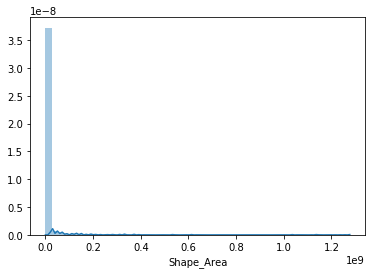

In [49]:
sns.distplot(all_wildfire['Shape_Area'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


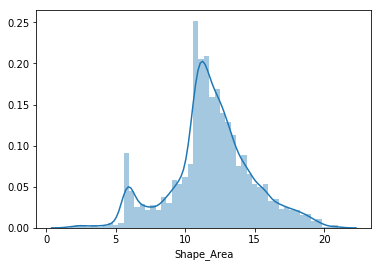

In [67]:
#og the shape are to make difference between shape area smaller
sns.distplot(np.log(all_wildfire['Shape_Area']))

In [68]:
all_wildfire['transformed_area'] = np.log(all_wildfire['Shape_Area'])

In [72]:
all_wildfire.to_file('wildfire_all/all_wildfire.shp')

In [74]:
reg = LinearRegression()
reg.fit(all_wildfire[['TAVG', 'PRCP']], all_wildfire['transformed_area'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
reg.coef_

array([-0.03233605,  0.00553435])

<Item title:"California Potential Wildfire Prediction" type:Map Image Layer owner:sih041_UCSDOnline2>
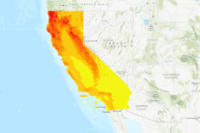

In [81]:
wf_pred = gis.content.get('225547c5513243c5bbafaf2182985cae')
wf_pred

Then, we use the above coefficient the combine the USA mean rainfall raster layer and the USA mean temperature raster layer. -0.03233605 and 0.00553435 correspond to the coefficient of USA mean rainfall raster layer and the coefficient to the USA mean temperature raster layer in order to get the prediction of severity of wildfire

## checking Data

In [38]:
import matplotlib.pyplot as plt
import geopandas as gpd


In [40]:
df = gpd.read_file('fire18_1.gdb', layer = 1).copy()
df.loc[:, 'Center'] = df.geometry.centroid


df.head()
#  5.519460e+05
# 1      1.182195e+06
# 2      1.912930e+04
# 3      9.203702e+04
# 4      4.303726e+05
# 5      1.214505e+06
# 6      3.011861e+05
# 7      4.238847e+05

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry,Center
0,2007,CA,CCO,LAC,OCTOBER,00246393,2007-10-21T00:00:00,2007-10-23T00:00:00,14.0,,NaN,25.736713,8.0,1.0,00233414,1902.439051,1.041528e+05,(POLYGON ((138036.9056999981 -402646.363300000...,POINT (138213.4325246252 -402730.0053904863)
1,2007,CA,CCO,LAC,MAGIC,00233077,2007-10-22T00:00:00,2007-10-25T00:00:00,14.0,,NaN,2824.877197,8.0,1.0,00233077,20407.965662,1.143187e+07,(POLYGON ((130072.4873999991 -398622.841500000...,POINT (126866.590106128 -400302.5641381571)
2,2007,CA,USF,ANF,RANCH,00000166,2007-10-20T00:00:00,2007-11-15T00:00:00,2.0,,54716.0,58410.335938,7.0,1.0,00000166,169150.715690,2.363782e+08,(POLYGON ((114013.9736000001 -379231.745500000...,POINT (114099.6195753832 -390035.4604487187)
3,2007,CA,CCO,LAC,EMMA,00201384,2007-09-11T00:00:00,2007-09-11T00:00:00,14.0,,NaN,172.214951,8.0,1.0,00201384,6117.777086,6.969292e+05,(POLYGON ((176902.2364000008 -388673.082499999...,POINT (177763.5593797001 -388193.7604435883)
4,2007,CA,CCO,LAC,CORRAL,00259483,2007-11-24T00:00:00,2007-11-27T00:00:00,14.0,,NaN,4707.997070,8.0,1.0,00259483,22907.182174,1.905259e+07,"(POLYGON ((115905.0064000003 -436381.1365, 115...",POINT (115578.3040978504 -439245.9241232093)


In [41]:
df

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry,Center
0,2007,CA,CCO,LAC,OCTOBER,00246393,2007-10-21T00:00:00,2007-10-23T00:00:00,14.0,,NaN,25.736713,8.0,1.0,00233414,1902.439051,1.041528e+05,(POLYGON ((138036.9056999981 -402646.363300000...,POINT (138213.4325246252 -402730.0053904863)
1,2007,CA,CCO,LAC,MAGIC,00233077,2007-10-22T00:00:00,2007-10-25T00:00:00,14.0,,NaN,2824.877197,8.0,1.0,00233077,20407.965662,1.143187e+07,(POLYGON ((130072.4873999991 -398622.841500000...,POINT (126866.590106128 -400302.5641381571)
2,2007,CA,USF,ANF,RANCH,00000166,2007-10-20T00:00:00,2007-11-15T00:00:00,2.0,,54716.00,58410.335938,7.0,1.0,00000166,169150.715690,2.363782e+08,(POLYGON ((114013.9736000001 -379231.745500000...,POINT (114099.6195753832 -390035.4604487187)
3,2007,CA,CCO,LAC,EMMA,00201384,2007-09-11T00:00:00,2007-09-11T00:00:00,14.0,,NaN,172.214951,8.0,1.0,00201384,6117.777086,6.969292e+05,(POLYGON ((176902.2364000008 -388673.082499999...,POINT (177763.5593797001 -388193.7604435883)
4,2007,CA,CCO,LAC,CORRAL,00259483,2007-11-24T00:00:00,2007-11-27T00:00:00,14.0,,NaN,4707.997070,8.0,1.0,00259483,22907.182174,1.905259e+07,"(POLYGON ((115905.0064000003 -436381.1365, 115...",POINT (115578.3040978504 -439245.9241232093)
5,2007,CA,CCO,LAC,GORMAN,00109398,2007-05-19T00:00:00,2007-05-22T00:00:00,14.0,,NaN,2373.844971,8.0,1.0,00109398,19693.208822,9.606609e+06,(POLYGON ((109769.1290000007 -360510.873800000...,POINT (108645.5914865064 -361278.2178588344)
6,2007,CA,CCO,LAC,WEST,00148311,2007-07-07T00:00:00,2007-07-08T00:00:00,14.0,,NaN,245.233963,8.0,1.0,00148311,5881.590454,9.924266e+05,(POLYGON ((154343.810899999 -357168.8728999998...,POINT (153917.4690622915 -357944.8599452339)
7,2007,CA,CCO,LAC,PEARBLOSSOM,00177427,2007-08-13T00:00:00,2007-08-14T00:00:00,14.0,,NaN,81.033501,8.0,1.0,00177427,4123.607761,3.279309e+05,(POLYGON ((172990.3240999989 -387628.120799999...,POINT (172892.6893866226 -387869.6795133005)
8,2007,CA,CCO,LAC,SKYLINE,00183643,2007-08-21T00:00:00,2007-08-23T00:00:00,14.0,,NaN,95.418556,8.0,1.0,00183643,3590.087163,3.861452e+05,(POLYGON ((184467.6964999996 -444709.422799999...,POINT (184026.2295407108 -444961.0645169762)
9,2007,CA,CCO,LAC,SESNON,00231876,2007-10-21T00:00:00,2007-10-21T00:00:00,14.0,,NaN,30.301418,8.0,1.0,00231876,1675.728250,1.226255e+05,(POLYGON ((132620.7758999988 -411038.806599999...,POINT (132589.3576251421 -411284.2343431081)


# 7. Descriptive Statistics for the Data

In our data there is spatial autocorrelation. From both of the methods, we have see that raster values are highly correlated with values that are close to them. It also makes sense in the reality where closer regions tend to have the same rain percipitation, temperature, and land cover types. We have seen also in our final output values that closer regions also have more correlated wildfire potentials. For more detialed information, espeically, the mean/standard deviation/other statistical analysis are embedded in the other sections. Please check the descriptive analysis under the discussion/analysis/conclusion/data cleaning sections as well.

The rest two questions may not be applicable to the project we were doing. This is because the main goal for our projects are coming up with the trained coefficients that will be used to combine those raster layers.

# Method 2

Like what we did in MP4, lets first check combining rasters using normal methods and then implementing the trained weights.

## Raster Analysis

In [ ]:
# Create a colormaps.

# binary colormap
clrmap2 =  [[1, 255, 0, 0], [0, 50, 0, 0]]

# 10 classese colormap
clrmap10 = [[10,200,30,30], [9, 230, 40, 0], [8, 242, 85, 0], [7, 250, 142, 0], [6, 255, 195, 0],
            [5, 255, 255, 0], [4,197, 219, 0], [3, 139, 181, 0], [2, 86, 148, 0], [1, 38, 115, 0]]
input_range = [0,25, 25,50, 50,75, 75,100, 100,125, 125,150, 150,175, 175,200, 200,225, 225,255]
output_val = [1,2,3,4,5,6,7,8,9,10]

### raster 1 landsat_10_c

In [13]:
#initializing ndvi/savi
output = ndvi(landsat, '5 4')
landsat_area = clip(raster=output, geometry = study_area_geom)
landsat_stretch = stretch(raster = landsat_area, stretch_type = 'StdDev', dra = 'true')


#making 10class classificartion from landsat/ndvi
landsat_10 = remap(raster=landsat_stretch,
                  input_ranges= input_range,
                  output_values= output_val,
                  no_data_ranges=[],
                  astype='UNKNOWN')

# color map w/ 10 colors
landsat_10_c = colormap(landsat_10, colormap = clrmap10)
landsat_10_c.extent = study_area_extent

map_landsat = gis.map('California')
map_landsat.legend=True
map_landsat.add_layer(landsat_10_c)
map_landsat

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### raster 2 temp_10_c

In [14]:
temp_area = clip(raster = usa_mean_temperature, geometry = study_area_geom)
temp_stretch = stretch(raster = temp_area, stretch_type = 'StdDev', dra = 'true')

# 10-level temperature filter
temp_10 = remap(raster=temp_stretch,
                  input_ranges= input_range,
                  output_values= output_val,
                  no_data_ranges=[],
                  astype='UNKNOWN')

# color map w/ 10 colors
temp_10_c = colormap(temp_10, colormap = clrmap10)

map_temp = gis.map('California')
map_temp.legend=True
map_temp.add_layer(temp_10_c)
map_temp

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### raster 3 rain_10_c

In [15]:
rain_area = clip(raster=usa_mean_rainfall, geometry = study_area_geom)
rain_stretch = stretch(raster = rain_area, stretch_type = 'StdDev', dra = 'true')

# 10-level classification of rain
rain_10 = remap(raster=rain_stretch,
                  input_ranges= input_range,
                  output_values= output_val,
                  no_data_ranges=[],
                  astype='UNKNOWN')

#binary color map w/ green and red
rain_10_c = colormap(rain_10, colormap = clrmap10)
rain_10_c.extent = study_area_extent

map_rain = gis.map('California')
map_rain.legend=True
map_rain.add_layer(rain_10_c)
map_rain

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [16]:
# clrmap1 = [[1, 255, 0, 0]

# ca = gis.content.search('california boundary, USA', 'Feature Layer', outside_org = True)
# # ca = gis.content.get('94c2521892fb4544af7ba28228b9cf85')
# ca[2]
ca_sdf = states_layer.query().sdf
ca_sdf = ca_sdf.loc[ca_sdf.STATE_ABBR == 'CA']
ca_sdf
# 
# new = gis.map('CA, USA')
# new.draw(ca_sdf.to_featureset())

# new.draw(ca_sdf.)
# new.add_layer(loading,
#                            {
#         "renderer" : "HeatmapRenderer",
#         "field_name" : "ALCOHOL_IN",
#                     })

# sdf_wetland = wetland_10_c.query().sdf
# sdf_wetland

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,SHAPE,SQMI,STATE_ABBR,STATE_FIPS,STATE_NAME,SUB_REGION,Shape__Area,Shape__Length,VACANT,WHITE
1,2590930,2823940,2765949,5317877,5182710,5252371,4036493,2505839,2275336,1370210,...,"{""rings"": [[[-13543710.3257494, 4603367.827345...",158144.83,CA,06,California,Pacific,6.479799e+11,5.237952e+06,1102583,21453934


### raster 4 land cover

In [17]:
wetland_area = clip(raster=usa_wetlands, geometry = study_area_geom)
wetland_stretch = stretch(raster = wetland_area, stretch_type = 'StdDev', dra = 'true')

In [18]:
# 10-level classification of rain
wetland_10 = remap(raster=wetland_stretch,
                  input_ranges= input_range,
                  output_values= output_val,
                  no_data_ranges=[],
                  astype='UNKNOWN')

#binary color map w/ green and red
wetland_10_c = colormap(wetland_10, colormap = clrmap10)
wetland_10_c.extent = study_area_extent



In [19]:
map_wetland = gis.map('California')
map_wetland.legend=True
map_wetland.add_layer(wetland_10_c)
map_wetland

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### raster 5 elevation_10_c

In [20]:
elevation_area = clip(raster=usa_elevation, geometry = study_area_geom)
elevation_stretch = stretch(raster = elevation_area, stretch_type = 'StdDev', dra = 'true')

# 10-level classification of rain
elevation_10 = remap(raster=elevation_stretch,
                  input_ranges= input_range,
                  output_values= output_val,
                  no_data_ranges=[],
                  astype='UNKNOWN')

#binary color map w/ green and red
elevation_10_c = colormap(elevation_10, colormap = clrmap10)
elevation_10_c.extent = study_area_extent

map_elevation = gis.map('California')
map_elevation.legend=True
map_elevation.add_layer(elevation_10_c)
map_elevation

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### raster 6 slope_10_c

In [21]:
slope_lyr = slope(dem=usa_elevation, slope_type='DEGREE', z_factor=20)
slope_area = clip(raster=slope_lyr, geometry = study_area_geom)
slope_stretch = stretch(raster = slope_area, stretch_type = 'StdDev', dra = 'true')

# 10-level classification of rain
slope_10 = remap(raster=slope_stretch,
                  input_ranges= input_range,
                  output_values= output_val,
                  no_data_ranges=[],
                  astype='UNKNOWN')

#binary color map w/ green and red
slope_10_c = colormap(slope_10, colormap = clrmap10)
slope_10_c.extent = study_area_extent

map_slope = gis.map('California')
map_slope.legend=True
map_slope.add_layer(slope_10_c)
map_slope

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [28]:
# type(land.layers[0])
# m1 = gis.map('USA')
land_sdf = land.layers[0].query(where ="Name='nlcd_2011'").sdf
# land_sdf.plot(map_widget= m1)
# m1
land_sdf

,Category,MaxPS,MinPS,Name,OBJECTID,SHAPE,Shape_Area,Shape_Length
0,1,3840,0,nlcd_2011,1,"{""rings"": [[[-2413626.8477999996, -1713301.844...",1.473032e+13,1.553815e+07


In [24]:
id2 = 'f51c8bb8c2b440ad8592327425261dd5'
land = gis.content.get(id2)
land_ly = land.layers[0]
land_ly.extent = study_area_extent

In [25]:
land_area = clip(raster = land_ly, geometry = study_area_geom)
land_stretch = stretch(raster = land_area, stretch_type = 'StdDev', dra = 'true')

In [26]:
land_area.attribute_table()['features'];

In [27]:
# land_10 = remap(raster=land
#                   input_ranges= input_range,
#                   output_values= output_val,
#                   no_data_ranges=[],
#                   astype='UNKNOWN')

#binary color map w/ green and red
# land_10_c = colormap(land_10, colormap = clrmap10)
# land_10_c.extent = study_area_extent

# land = study_area_extent

land.extent = study_area_extent
map_land = gis.map('California')
map_land.legend=True
map_land.add_layer(land_stretch)
map_land

MapView(layout=Layout(height='400px', width='100%'), legend=True)

# 9 combining rasters

In [29]:
# trying out ways to combine rasters for 5-level classification

# landsat_10_c, temp_10_c, rain_10_c, wetland_10_c, elevation_10_c, slope_10_c
rc_out1 = raster_calculator(
                            rasters = [elevation_10_c, rain_10_c, temp_10_c, land_stretch], 
                            input_names = ['a','b', 'c', 'd'],
#                             expression = "0.1*a + 0.5*b + 0.2*c", 
                            expression = "(0.1 * a + 0.3 * b + 0.3 * c + 0.3 * d)",
#                             expression = '0 * c + 2',
                            extent_type='FirstOf',
                            cellsize_type='FirstOf', astype='U8')
#re_2 = times([rc_out2,rc_out1])

rc_out1_5_c = colormap(rc_out1, colormap=clrmap10)

map_out = gis.map('California')
map_out.legend=True
map_out.add_layer(rc_out1_5_c)
map_out

MapView(layout=Layout(height='400px', width='100%'), legend=True)

<Item title:"USA Wildland Fire Potential (Mature Support)" type:Imagery Layer owner:esri>
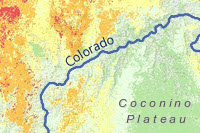

In [30]:
items = gis.content.search('USA, wildfires', 'Image Layer', outside_org = True)
item = items[0]
item

In [31]:
# fire station
# escape route

usa_mean_temperature.query('OBJECTID = 11')

<FeatureSet> 1 features

In [32]:
usa_mean_temperature.query().sdf

,Category,MaxPS,MinPS,Name,OBJECTID,SHAPE,Shape_Area,Shape_Length
0,1,3.748356e+03,0.000000,Temperature_US_USDA_2000_Celsius,11,"{""rings"": [[[-2852881.220899999, -1846645.1409...",1.915690e+13,1.816641e+07
1,2,7.496712e+03,3748.355908,Ov_i06_L01_R00000000_C00000000.tif,12,"{""rings"": [[[2505393.549800001, -1846645.1409]...",1.784025e+13,1.737550e+07
2,2,7.496712e+03,3748.355908,Ov_i06_L01_R00000000_C00000001.tif,13,"{""rings"": [[[2900845.098099999, -1846645.1409]...",1.316647e+12,7.449857e+06
3,2,1.499342e+04,7496.711816,Ov_i06_L02_R00000000_C00000000.tif,14,"{""rings"": [[[2900845.098099999, -1846645.1409]...",1.915690e+13,1.816641e+07
4,2,2.998685e+04,14993.423633,Ov_i06_L03_R00000000_C00000000.tif,15,"{""rings"": [[[2900845.098099999, -1846645.1409]...",1.915690e+13,1.816641e+07
5,2,1.499342e+06,29986.847265,Ov_i06_L04_R00000000_C00000000.tif,16,"{""rings"": [[[2900845.098099999, -1846645.1409]...",1.915690e+13,1.816641e+07


# 10 checking Data

In [38]:
import matplotlib.pyplot as plt
import geopandas as gpd


In [40]:
df = gpd.read_file('fire18_1.gdb', layer = 1).copy()
df.loc[:, 'Center'] = df.geometry.centroid


df.head()
#  5.519460e+05
# 1      1.182195e+06
# 2      1.912930e+04
# 3      9.203702e+04
# 4      4.303726e+05
# 5      1.214505e+06
# 6      3.011861e+05
# 7      4.238847e+05

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry,Center
0,2007,CA,CCO,LAC,OCTOBER,00246393,2007-10-21T00:00:00,2007-10-23T00:00:00,14.0,,NaN,25.736713,8.0,1.0,00233414,1902.439051,1.041528e+05,(POLYGON ((138036.9056999981 -402646.363300000...,POINT (138213.4325246252 -402730.0053904863)
1,2007,CA,CCO,LAC,MAGIC,00233077,2007-10-22T00:00:00,2007-10-25T00:00:00,14.0,,NaN,2824.877197,8.0,1.0,00233077,20407.965662,1.143187e+07,(POLYGON ((130072.4873999991 -398622.841500000...,POINT (126866.590106128 -400302.5641381571)
2,2007,CA,USF,ANF,RANCH,00000166,2007-10-20T00:00:00,2007-11-15T00:00:00,2.0,,54716.0,58410.335938,7.0,1.0,00000166,169150.715690,2.363782e+08,(POLYGON ((114013.9736000001 -379231.745500000...,POINT (114099.6195753832 -390035.4604487187)
3,2007,CA,CCO,LAC,EMMA,00201384,2007-09-11T00:00:00,2007-09-11T00:00:00,14.0,,NaN,172.214951,8.0,1.0,00201384,6117.777086,6.969292e+05,(POLYGON ((176902.2364000008 -388673.082499999...,POINT (177763.5593797001 -388193.7604435883)
4,2007,CA,CCO,LAC,CORRAL,00259483,2007-11-24T00:00:00,2007-11-27T00:00:00,14.0,,NaN,4707.997070,8.0,1.0,00259483,22907.182174,1.905259e+07,"(POLYGON ((115905.0064000003 -436381.1365, 115...",POINT (115578.3040978504 -439245.9241232093)


In [41]:
df

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,geometry,Center
0,2007,CA,CCO,LAC,OCTOBER,00246393,2007-10-21T00:00:00,2007-10-23T00:00:00,14.0,,NaN,25.736713,8.0,1.0,00233414,1902.439051,1.041528e+05,(POLYGON ((138036.9056999981 -402646.363300000...,POINT (138213.4325246252 -402730.0053904863)
1,2007,CA,CCO,LAC,MAGIC,00233077,2007-10-22T00:00:00,2007-10-25T00:00:00,14.0,,NaN,2824.877197,8.0,1.0,00233077,20407.965662,1.143187e+07,(POLYGON ((130072.4873999991 -398622.841500000...,POINT (126866.590106128 -400302.5641381571)
2,2007,CA,USF,ANF,RANCH,00000166,2007-10-20T00:00:00,2007-11-15T00:00:00,2.0,,54716.00,58410.335938,7.0,1.0,00000166,169150.715690,2.363782e+08,(POLYGON ((114013.9736000001 -379231.745500000...,POINT (114099.6195753832 -390035.4604487187)
3,2007,CA,CCO,LAC,EMMA,00201384,2007-09-11T00:00:00,2007-09-11T00:00:00,14.0,,NaN,172.214951,8.0,1.0,00201384,6117.777086,6.969292e+05,(POLYGON ((176902.2364000008 -388673.082499999...,POINT (177763.5593797001 -388193.7604435883)
4,2007,CA,CCO,LAC,CORRAL,00259483,2007-11-24T00:00:00,2007-11-27T00:00:00,14.0,,NaN,4707.997070,8.0,1.0,00259483,22907.182174,1.905259e+07,"(POLYGON ((115905.0064000003 -436381.1365, 115...",POINT (115578.3040978504 -439245.9241232093)
5,2007,CA,CCO,LAC,GORMAN,00109398,2007-05-19T00:00:00,2007-05-22T00:00:00,14.0,,NaN,2373.844971,8.0,1.0,00109398,19693.208822,9.606609e+06,(POLYGON ((109769.1290000007 -360510.873800000...,POINT (108645.5914865064 -361278.2178588344)
6,2007,CA,CCO,LAC,WEST,00148311,2007-07-07T00:00:00,2007-07-08T00:00:00,14.0,,NaN,245.233963,8.0,1.0,00148311,5881.590454,9.924266e+05,(POLYGON ((154343.810899999 -357168.8728999998...,POINT (153917.4690622915 -357944.8599452339)
7,2007,CA,CCO,LAC,PEARBLOSSOM,00177427,2007-08-13T00:00:00,2007-08-14T00:00:00,14.0,,NaN,81.033501,8.0,1.0,00177427,4123.607761,3.279309e+05,(POLYGON ((172990.3240999989 -387628.120799999...,POINT (172892.6893866226 -387869.6795133005)
8,2007,CA,CCO,LAC,SKYLINE,00183643,2007-08-21T00:00:00,2007-08-23T00:00:00,14.0,,NaN,95.418556,8.0,1.0,00183643,3590.087163,3.861452e+05,(POLYGON ((184467.6964999996 -444709.422799999...,POINT (184026.2295407108 -444961.0645169762)
9,2007,CA,CCO,LAC,SESNON,00231876,2007-10-21T00:00:00,2007-10-21T00:00:00,14.0,,NaN,30.301418,8.0,1.0,00231876,1675.728250,1.226255e+05,(POLYGON ((132620.7758999988 -411038.806599999...,POINT (132589.3576251421 -411284.2343431081)


# 11 Define a loss to minimize

In [2]:
def define_region(img):
    shape = img.shape
    out = img.copy()
    out = (out != 255)
    return out

# def normalize_map(img, region_mtrx):
def mse(img1, img2):
    err = np.sum((img1.astype("float") - img2.astype("float")) ** 2)
    err /= float(img1.shape[0] * img1.shape[1])
    return err

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [9]:
raster_rain = plt.imread('USA_Mean_Rainfall_Clip.tif')[:, :, 0]
raster_temp = plt.imread('USA_Mean_Temperature_Clip.tif')[:, :, 2]

raster_tester_rain = plt.imread('USA_Mean_Rainfall_Cl_1.tif')[:, :, 0]

raster_tester_temp = plt.imread('USA_Mean_Temperature_1.tif')[:, :, 0]

raster_tester_fire = plt.imread('fire_raster_sam.tif')[:, :, 0]

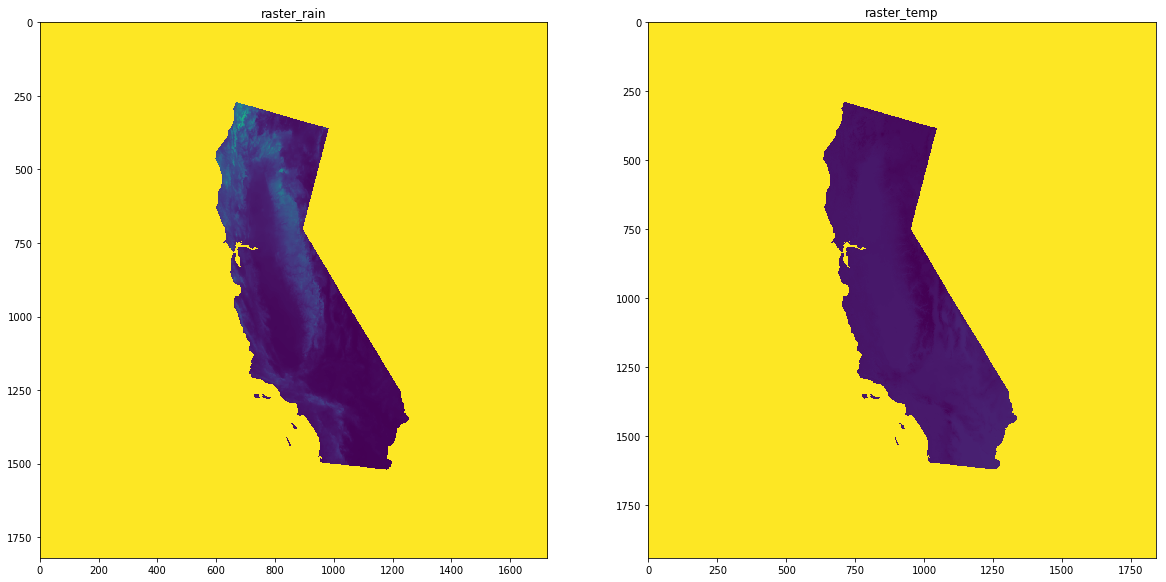

In [10]:
fig = plt.figure(figsize=(20,40))

plt.subplot(2, 2, 1)
plt.title('raster_rain')
plt.imshow(raster_rain)

plt.subplot(2, 2, 2)
plt.title('raster_temp')
plt.imshow(raster_temp)


plt.show()

# 12 getting a small sample to test on with raster layer rain and temp.

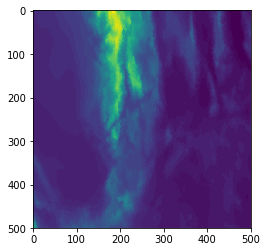

In [11]:
plt.imshow(raster_tester_rain)

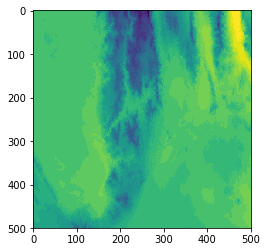

In [12]:
plt.imshow(raster_tester_temp)

(500, 500)


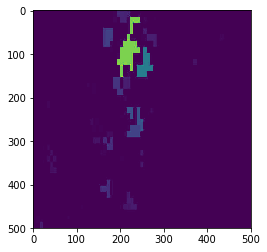

In [13]:
# raster_tester_fire = np.stack([raster_tester_fire] * 3, -1)
plt.imshow(raster_tester_fire)
print(raster_tester_fire.shape)

In [14]:
a, b = 1, 1
# print()
weights = np.array([[a, b]])
# feature = np.stack([raster_tester_temp, raster_tester_rain, raster_tester_temp], -1)
feature = a * raster_tester_temp + b * raster_tester_rain
print(feature.shape)
# feature = weights.T @ feature
# feature = weights * feature
# feature = feature - feature.min() // (feature.max() - feature.min())

# vis_feature = np.stack([feature] * 3, -1)
# # vis_feature.shape

# plt.imshow(vis_feature)

# # x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

min_ = np.inf
for i in np.arange(-10, 10, 0.1):
    for j in np.arange(-10, 10, 0.1):
        a, b = i, j
        feature = a * raster_tester_temp + b * raster_tester_rain
        loss = mse(feature, raster_tester_fire)
        if loss < min_:
            min_ = loss
            coeff = [i, j]

print(loss, coeff)

(500, 500)
63439.61154527907 [-0.20000000000003482, 0.4999999999999627]


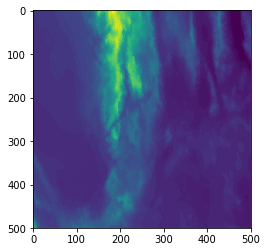

In [15]:
a, b = -0.20000000000003482, 0.4999999999999627
feature = a * raster_tester_temp + b * raster_tester_rain
# feature = feature - feature.min() // (feature.max() - feature.min())

plt.imshow(feature)

# seems like this method works; now we will look for the whole map

In [2]:
rain_usa = plt.imread('USA_Rain_All_2.tif')
temp_usa = plt.imread('USA_Temp_All_2.tif')
land_usa = plt.imread('USA_Land_All.tif')
# land_usa.shape
fire_usa = plt.imread('Fire_Area_2.tif')

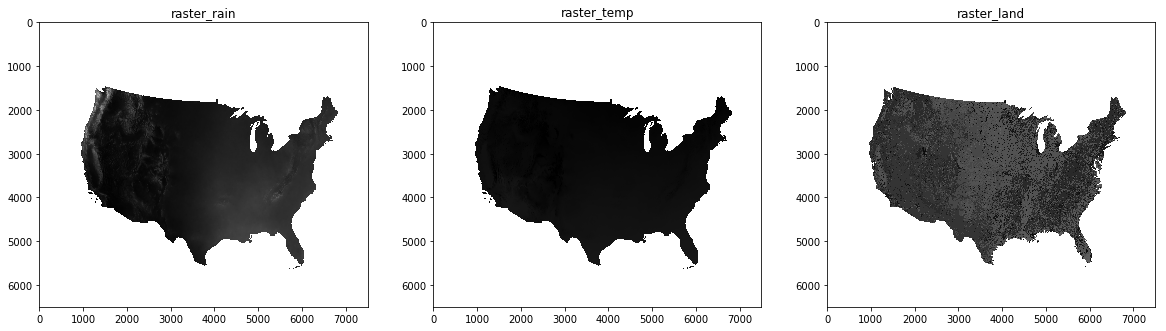

In [3]:
# temp_region = define_region(raster_temp)
# rain_region = define_region(raster_rain)
fig = plt.figure(figsize=(20,40))

plt.subplot(131)
plt.title('raster_rain')
plt.imshow(rain_usa)

plt.subplot(132)
plt.title('raster_temp')
plt.imshow(temp_usa)


plt.subplot(133)
plt.title('raster_land')
plt.imshow(land_usa)

plt.show()

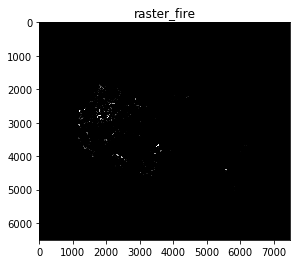

In [5]:
plt.title('raster_fire')
plt.imshow(fire_usa)

# extracting the rasters images' first channel and resize them

In [ ]:
raster_rain = rain_usa[1450:5700, 900: 6900, 0]
raster_temp = temp_usa[1450:5700, 900: 6900, 1]
raster_land = land_usa[1450:5700, 900: 6900, 0]
raster_fire = fire_usa[1450:5700, 900: 6900, 0]

fig = plt.figure(figsize=(20,40))

plt.subplot(131)
plt.title('raster_rain')
plt.imshow(raster_rain)

plt.subplot(132)
plt.title('raster_temp')
plt.imshow(raster_temp)

plt.subplot(133)
plt.title('raster_land')
plt.imshow(raster_land)

plt.show()

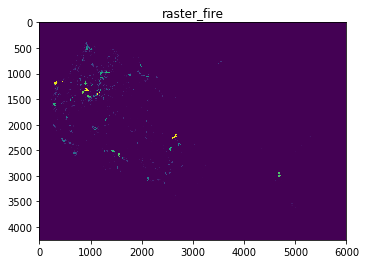

In [6]:
raster_fire = fire_usa[1450:5700, 900: 6900, 0]

plt.title('raster_fire')
plt.imshow(raster_fire)

# 13 convolve using a gaussian2d kernel

In [3]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    H, W = image.shape
    out = np.zeros((H + pad_top + pad_down, W + pad_left + pad_right))
    rows_record = []
    for time in range(pad_top):
        rows_record.append([0] * (W + pad_left + pad_right))
        
    for row in image:
        to_append = [0] * pad_left + row.tolist() + [0] * pad_right
        rows_record.append(to_append)
    
    for time in range(pad_down):
        rows_record.append([0] * (W + pad_left + pad_right))
    return np.array(rows_record)

def conv(img, kernel):
    image = img.copy()
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    
    pad_top, pad_down, pad_left, pad_right = [Hk // 2, Hk // 2, Wk // 2, Wk // 2]
    padded = zero_pad(image, pad_top, pad_down, pad_left, pad_right)
    flipped_kernel = np.flip(kernel)
    print('in progress')
    for h in range(Hi):
        for w in range(Wi):
            to_sum = flipped_kernel * padded[h : h + Hk, w : w + Wk]
            out[h, w] = np.sum(
                to_sum
            )

    return out

def blur_image(img):
    """Blur the image by convolving with a Gaussian filter."""
    out = conv(img, gaussian2d())
    return out

def plot_comparison(img, figsize = (5, 10), title = 'title'):
    # img.shape
    fig = plt.figure(figsize = figsize)
    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.title('Original ' + title)
    plt.axis('off')

    # Plot blurred image
    plt.subplot(2,2,2)
    out = blur_image(img)
    plt.imshow(out)
    # save those convolved images to local as they take so long to run
    
    from scipy.misc import imsave
    imsave(title + ".png", img)
    
    plt.title('Blurred ' + title)
    plt.axis('off')

    plt.show()

In [4]:
def gaussian2d(filter_size=5, sig =2.0):
    """
    Creates 2D Gaussian kernel with side length `filter_size` and a sigma of `sig`.
    Source: https://stackoverflow.com/a/43346070
    """
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def mean2d(filter_size = 5):
    out = np.ones((filter_size, filter_size))
    factor = np.sum(out)
    
    return out // factor

## the function of applying a kernel:

<img src = 'img_3.PNG' style='width: 400px;'/> 

<p>the goal of apply a guassian kernel t oour image layer is because we want to smooth out the raster values over a specified window size. This is the same as we apply focal to our rasters. Also, the center at which the kernel is placed iteratively will have a higher weights. Therefore, the values near the center will tend to have larger values than those around the border. The The pixels (j, i) at the convolved image I is calculated by summing over all values in the kernels at that positive divided by a average factors</p>
<img src = 'img_4.PNG' style='width: 300px'/> 
Here is an example of what a guassian kernel should look like.

image from 

[www.google.com/search?q=kernel+gaussian&rlz=1C1GCEV_enUS853US853&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjNhrXt3OLiAhWXrZ4KHVTCDRsQ_AUIECgB&biw=1920&bih=1040#imgrc=6nkc69-1zA_kKM:]



## let's first test on a smaller image:

in progress


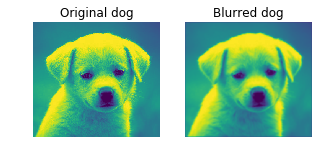

In [12]:
dog = plt.imread('dog.jpg')[:, :, 0]
figsize = (5, 10)
convolved_dog = plot_comparison(dog, figsize, 'dog')

## it works! now we will move on to place this kernel onto the USA_Rain and USA_Temp map

in progress


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


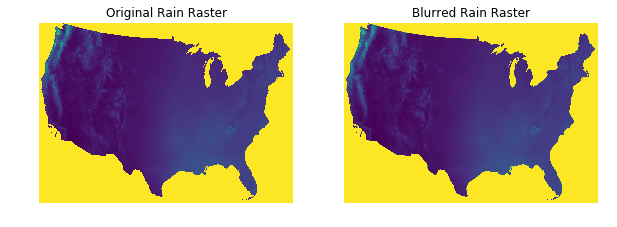

In [28]:
figsize = (10, 20)
plot_comparison(raster_rain, figsize, 'Rain Raster')

in progress


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


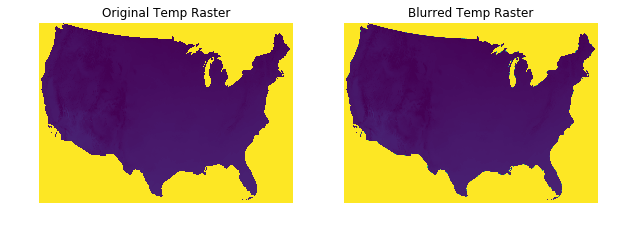

In [29]:
plot_comparison(raster_temp, figsize, 'Temp Raster')

in progress


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


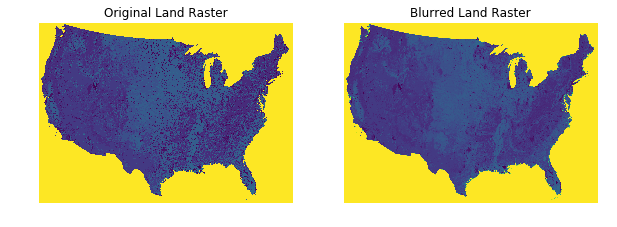

In [30]:
plot_comparison(raster_land, figsize, 'Land Raster')

in progress


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


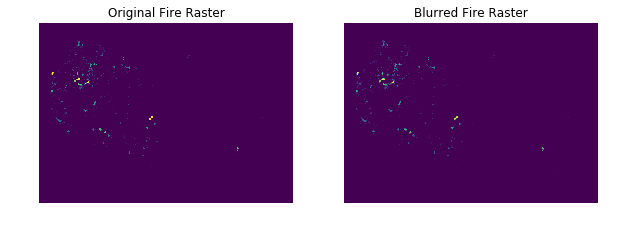

In [31]:
plot_comparison(raster_fire, figsize, 'Fire Raster')

# 14 Try grid search first to find the argument min of the defined loss

In [11]:
# creata a random sample of images
def sample_subimg(img, window_size, patch_size):
     return image.extract_patches_2d(img, (window_size, window_size), patch_size)

convolved_land, convolved_rain, convolved_temp = plt.imread('Land Raster.png'), \
plt.imread('Rain Raster.png'), plt.imread('Temp Raster.png')


convolved_fire = plt.imread('Fire Raster.png')
# convolved_fire.shape

(1, 100, 100, 4)


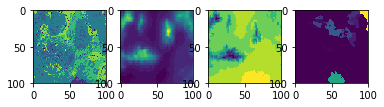

In [31]:
# from scipy.stats import truncnor
feature_stack = np.stack([convolved_land, convolved_rain, convolved_temp, convolved_fire], -1)
# plt.imshow(image_stack)
# image_stack.shape


# specific sample size n
window_size = 100
patch_size = 1

sample_patches = sample_subimg(feature_stack, window_size, patch_size)

# plt.imshow(sample_patches[0][:,:, :3])
# plt.imshow(sample_patches[0][:,:, -1])


print(sample_patches.shape)

plt.subplot(141)
plt.imshow(sample_patches[0, :, :, 0])

plt.subplot(142)
plt.imshow(sample_patches[0, :, :, 1])

plt.subplot(143)
plt.imshow(sample_patches[0, :, :, 2])

plt.subplot(144)
plt.imshow(sample_patches[0, :, :, 3])

### first iteration on map with patch 100 X 100 with a 5 X 5 guassian kernel

In [32]:
a, b, c = 1, 1, 1

loss_record = []
min_ = np.inf
idx = 0

for i in np.arange(-5, 5, 0.1):
    for j in np.arange(-5, 5, 0.1):
        for k in np.arange(-5, 5, 0.1):
            feature = i * sample_patches[int(idx), :, :, 0] +\
            j * sample_patches[int(idx), :, :, 1] +\
            k * sample_patches[int(idx), :, :, 2]

            loss = mse(feature, sample_patches[int(idx), :, :, -1])
            loss_record = loss
            if loss < min_:
                min_ = loss
                coeff = [i, j, k]

print(loss, coeff)

2.285334233683774 [-0.10000000000001741, 0.19999999999998153, 0.7999999999999794]


### second iteration on map with patch 100 X 100 with a 5 X 5 guassian kernel

(1, 100, 100, 4)


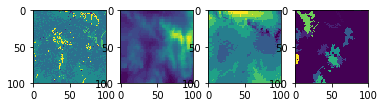

In [49]:
feature_stack = np.stack([convolved_land, convolved_rain, convolved_temp, convolved_fire], -1)


# specific sample size n
window_size = 100
patch_size = 1

sample_patches = sample_subimg(feature_stack, window_size, patch_size)


print(sample_patches.shape)

plt.subplot(141)
plt.imshow(sample_patches[0, :, :, 0])

plt.subplot(142)
plt.imshow(sample_patches[0, :, :, 1])

plt.subplot(143)
plt.imshow(sample_patches[0, :, :, 2])

plt.subplot(144)
plt.imshow(sample_patches[0, :, :, 3])


In [65]:
window_size = 500
patch_size = 1

sample_patches = sample_subimg(feature_stack, window_size, patch_size)

for i in np.arange(-5, 5, 0.1):
    for j in np.arange(-5, 5, 0.1):
        for k in np.arange(-5, 5, 0.1):
            feature = i * sample_patches[int(idx), :, :, 0] +\
            j * sample_patches[int(idx), :, :, 1] +\
            k * sample_patches[int(idx), :, :, 2]

            loss = mse(feature, sample_patches[int(idx), :, :, -1])
            loss_record = loss
            if loss < min_:
                min_ = loss
                coeff = [i, j, k]

print(loss, coeff)

KeyboardInterrupt: 

### third iteration on map with patch 100 X 100 with a 5 X 5 guassian kernel

(1, 100, 100, 4)


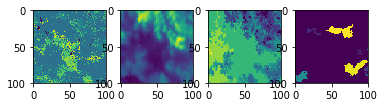

In [92]:
feature_stack = np.stack([convolved_land, convolved_rain, convolved_temp, convolved_fire], -1)


# specific sample size n
window_size = 100
patch_size = 10

sample_patches = sample_subimg(feature_stack, window_size, patch_size)

print(sample_patches.shape)

plt.subplot(141)
plt.imshow(sample_patches[0, :, :, 0])

plt.subplot(142)
plt.imshow(sample_patches[0, :, :, 1])

plt.subplot(143)
plt.imshow(sample_patches[0, :, :, 2])

plt.subplot(144)
plt.imshow(sample_patches[0, :, :, 3])

In [93]:
for idx in range(patch_size):
    for i in np.arange(-5, 5, 0.1):
        for j in np.arange(-5, 5, 0.1):
            for k in np.arange(-5, 5, 0.1):
                feature = i * sample_patches[int(idx), :, :, 0] +\
                j * sample_patches[int(idx), :, :, 1] +\
                k * sample_patches[int(idx), :, :, 2]

                loss = mse(feature, sample_patches[int(idx), :, :, -1])
                loss_record = loss
                if loss < min_:
                    min_ = loss
                    coeff = [i, j, k]

    print(loss, coeff)

2.3352764466981433 [-1.7763568394002505e-14, 0.09999999999998188, -0.20000000000001705]


3.657524072556197


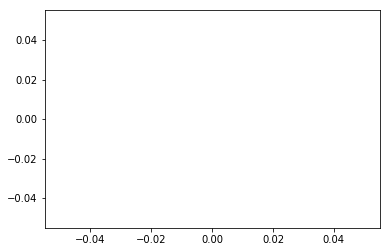

In [112]:
# plotting the loss graph
x = np.linspace(-1, 1)
plt.plot(x = x, y = loss_record)
print(loss_record)

# Discussion 

### Output Map UrlLink: 
https://ucsdonline.maps.arcgis.com/home/webmap/viewer.html?layers=33747fd9a514478880a5ba4a60ad42e9

<Item title:"DSC170_Final_Output" type:Map Image Layer owner:y3ning_UCSDOnline4>
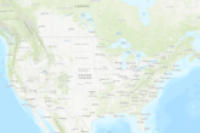

In [92]:
item = gis.content.get('33747fd9a514478880a5ba4a60ad42e9')
item

# 9 and 10 Summary and Discussion of Products and Results
## Summary
## Method 1
We used the coefficients trained from method one to combine the USA mean rainfall raster layer and the USA mean temperature raster layer. -0.03233605 and 0.00553435 correspond to the coefficient of USA mean rainfall raster layer and the coefficient to the USA mean temperature raster layer in order to get the prediction of severity of wildfire.

<img src='img_method_1.png' style = 'width: 600px;' /> 

In the prediction map, we found out that the past large wildfires mostly lays in class level above 3. Since the prediction map work well, we would like to claim that both mean temperature and mean rainfall contribute a lot to the happening of wildfires.


## Method2
###  Wildfire Potential Map w/ trained weights

<img src="img_9.PNG" style="width: 800px;"/>

Looking closer at our map. we found something really interesting. First of all, we classified wildfire potentials in terms of a label from 1 to 5; and in this chart the map, the fire potentials are also classified into five different colors. Green means the wildfire potential is low; followed by light green; followed by yellow' followed by orange; followed by red with shows a high wildfire potential.
<img src="img_10.PNG" style="width: 100;"/>

We run a bunch of times and the description belows are based on our best results. We can see the roughly calculate coefficient for the land cover parameter is -0.1 which is relatively small. Since the land cover raster only has categorical values. The coefficient is very small as to regard this layer some errors.

This map really matches the common sense we have. We know when there is a lots of rains, there will be more plants/vegetation cover, providing fuels for the fire to grow. As we tranined our sample over an image patch. The linear regression coefficient for the rain variable is from 0.09 to 0.2. We finally fix this value to be about 0.19. This quite makes sense.

The coefficient for the temperature variable is 0.2
(a combination of markdown and documented code cells)
<img src="img_14.PNG" style="width: 100;"/>

To better visial the efficientcy of developing this map, have a look at the fire data as well. Those black regions are fire data and their colors represents different degrees of area get affected.
<img src="img_13.PNG" style="width: 100;"/>



## Discussion
Both of the methods show that temperature and precipitation/rainfall are important factors of the appearance of wildfires. In the second method, it also finds out that the land cover is an important factor to the appearance of wildfires. Thus, it does validate the what we found in literature, where temperature, precipitation and literature are important the appearance of wildfires. 

In the first method, we compromise using the land cover layer. We could not group classes to decrease to a certain number of classes we want. After transfering to feature layer, it is too large to export to Shapefile. Also, we tried to use the methods on Arcgis Pro, Such as GWS and OLS. However, both did not work and we could not figure out why. Thus, we chose use linear regression on Python to train our model.

For method 2:
To save more time, we compromised the kerenal size/better loss functions/higher resolution maps.
Since the algorthms that we used to run the coefficients are kind of slow. 

To save more time, we compromised the kernel size and set it to be 5px instead of what was tested previoiusly 50 X 50 and 100 x 100. In fact, it is better to use kernels with relatively larger size since our raster layres are big in size and using larger kernel will eliminate errors.

Likewise, instead of using Normialized Crossinng Comparison (NCC), we use MSE as our loss function. NCC will take more steps thus be more time-consuming.

In addition, we only used 32-bits rasters. A better choice is to use 64-bits images.

# 11.Conclusions and Feature Work

We are not completely satisfied with our result. Some of the goals are not reached - e.g. we didn't get how confidance the coefficient is. After complete our final project, we both begin to think about what part we need to improve.

**So for the first method**, using the weather data, we want to be able to incorporate more dataset related to the topic. For example, we want to incorporate the land cover dataset and the slope dataset into the Geographically Weighted Regression in arcgis pro. However, we could not change the classes of land cover image layer on both arcgis Pro and Python, while the Arcgis Pro requested extra license for Training Sample Manager for merge classes. I converted the original land cover image layer to a feature layer on arcgis pro. However, the feature layer is too large and takes too long to export to Shapefile. Thus, if possible, I would still want to use the land cover to train the prediction model. For future, we also want to incoporate dataset about wind, drought to see which factors affect or affect how much on the possible severity of wildfires in California.

**For the second method**, we didn't find previously developed methods. So we invented one ourselves. Although this is innovative, there are some unsolved issues too.
- **curse of dimensionality**; in our sutability model/linear regression, we really need to improve search algorithms. Instead of using grid search, we may consider to use.


- **using different kernel size**; since the grid search algorithms take toooooooo much time to run and once we increase the kernel size (increase size makes the images more blurred), it only takers longers. To compromise, we set the size of kernel to be 5. A general size of 10 to 30 consideing our image size can guarantee both the imaged to be properly convolved and to be summaized accordingly.


- **changing features/ make features more complicated**; usa annual rain, temperature, and a land cover raster layers are used. A better model should also take into consideration of other possible featuers: humidity index, drought index, wind direction, and other unseen but potential features.


- **changing labels/ making labels more complicated**; we use the arces of land get burned at our labels/how severity the fire is. This might not be the case in real life. Maybe a long-last fires cause more damages than a fires that burned a large area of grassland where no people live. The label could also be described using a sutability model such that the fire severity is measure by 50% of the area get burnt and 50% duration time of burning. 


- **use a different loss instead of MSE**; in general, MSE or Sum of Squared Differences is the most common method to summarize the disparity between two models. Normalized Cross Correlation) (NCC) method might do better thann MSE as NCC eliminates errors by normalizing the raster values with respect to each image.